## Learning rate-ek összehasonlítása Adam optimizerrel (MSE-loss)



In [1]:
#%% 1. Setup és adatok
import sys, os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(".."))
from complex_mlp.model import ComplexMLP

# Adat betöltése és előkészítés
data = np.load("../data/processed/dataset_preProcessed.npz")
X = data["images"].reshape(len(data["images"]), -1) / 255.0
y = data["labels"]

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

input_dim   = X_tr.shape[1]
n_classes   = len(np.unique(y_tr))
layer_sizes = [input_dim, 512, n_classes]
activations = ["tanh", "softmax"]

# One-hot a MSE-hez
y_tr_hot  = np.eye(n_classes)[y_tr]
y_val_hot = np.eye(n_classes)[y_val]


In [3]:
#%% 2. Learning rate-ek definiálása
lr_list = [0.001, 0.005, 0.01, 0.05, 0.0005]


In [4]:
#%% 3. Tesztciklus különböző LR-ekkel
results = []

for lr in lr_list:
    print(f"--- Teszt: lr = {lr} ---")
    model = ComplexMLP(
        layer_sizes=layer_sizes,
        activations=activations,
        loss="mse",
        optimizer="adam",
        optimizer_kwargs={"lr": lr, "beta1": 0.9, "beta2": 0.999, "eps": 1e-8},
        early_stopping=False
    )
    history = model.train(
        X_train=X_tr, y_train=y_tr_hot,
        X_val=X_val,   y_val=y_val_hot,
        epochs=10, batch_size=32
    )
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    print(f"lr={lr} → val_accuracy = {acc:.4f}\n")
    results.append({"lr": lr, "val_accuracy": acc})

df = pd.DataFrame(results).sort_values("val_accuracy", ascending=False)
display(df)


--- Teszt: lr = 0.001 ---
Epoch 1/10  train_loss=0.0165  val_loss=0.0128
Epoch 2/10  train_loss=0.0123  val_loss=0.0130
Epoch 3/10  train_loss=0.0109  val_loss=0.0110
Epoch 4/10  train_loss=0.0100  val_loss=0.0102
Epoch 5/10  train_loss=0.0095  val_loss=0.0114
Epoch 6/10  train_loss=0.0092  val_loss=0.0102
Epoch 7/10  train_loss=0.0089  val_loss=0.0096
Epoch 8/10  train_loss=0.0086  val_loss=0.0090
Epoch 9/10  train_loss=0.0087  val_loss=0.0089
Epoch 10/10  train_loss=0.0083  val_loss=0.0091
lr=0.001 → val_accuracy = 0.9445

--- Teszt: lr = 0.005 ---
Epoch 1/10  train_loss=0.0272  val_loss=0.0189
Epoch 2/10  train_loss=0.0217  val_loss=0.0207
Epoch 3/10  train_loss=0.0215  val_loss=0.0190
Epoch 4/10  train_loss=0.0214  val_loss=0.0232
Epoch 5/10  train_loss=0.0222  val_loss=0.0178
Epoch 6/10  train_loss=0.0215  val_loss=0.0203
Epoch 7/10  train_loss=0.0215  val_loss=0.0325
Epoch 8/10  train_loss=0.0225  val_loss=0.0213
Epoch 9/10  train_loss=0.0219  val_loss=0.0195
Epoch 10/10  train_l

,lr,val_accuracy
4,0.0005,0.951189
0,0.0010,0.944469
1,0.0050,0.848914
2,0.0100,0.725594
3,0.0500,0.725594


In [5]:
lr_list = [0.0001, 0.00001]

In [6]:
for lr in lr_list:
    print(f"--- Teszt: lr = {lr} ---")
    model = ComplexMLP(
        layer_sizes=layer_sizes,
        activations=activations,
        loss="mse",
        optimizer="adam",
        optimizer_kwargs={"lr": lr, "beta1": 0.9, "beta2": 0.999, "eps": 1e-8},
        early_stopping=False
    )
    history = model.train(
        X_train=X_tr, y_train=y_tr_hot,
        X_val=X_val,   y_val=y_val_hot,
        epochs=10, batch_size=32
    )
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    print(f"lr={lr} → val_accuracy = {acc:.4f}\n")
    results.append({"lr": lr, "val_accuracy": acc})

df = pd.DataFrame(results).sort_values("val_accuracy", ascending=False)
display(df)

--- Teszt: lr = 0.0001 ---
Epoch 1/10  train_loss=0.0198  val_loss=0.0137
Epoch 2/10  train_loss=0.0139  val_loss=0.0130
Epoch 3/10  train_loss=0.0134  val_loss=0.0127
Epoch 4/10  train_loss=0.0127  val_loss=0.0120
Epoch 5/10  train_loss=0.0115  val_loss=0.0110
Epoch 6/10  train_loss=0.0105  val_loss=0.0105
Epoch 7/10  train_loss=0.0100  val_loss=0.0103
Epoch 8/10  train_loss=0.0095  val_loss=0.0100
Epoch 9/10  train_loss=0.0092  val_loss=0.0096
Epoch 10/10  train_loss=0.0089  val_loss=0.0097
lr=0.0001 → val_accuracy = 0.9400

--- Teszt: lr = 1e-05 ---
Epoch 1/10  train_loss=0.0402  val_loss=0.0303
Epoch 2/10  train_loss=0.0237  val_loss=0.0188
Epoch 3/10  train_loss=0.0174  val_loss=0.0159
Epoch 4/10  train_loss=0.0157  val_loss=0.0153
Epoch 5/10  train_loss=0.0149  val_loss=0.0144
Epoch 6/10  train_loss=0.0144  val_loss=0.0140
Epoch 7/10  train_loss=0.0141  val_loss=0.0143
Epoch 8/10  train_loss=0.0139  val_loss=0.0138
Epoch 9/10  train_loss=0.0138  val_loss=0.0135
Epoch 10/10  train

,lr,val_accuracy
4,0.00050,0.951189
0,0.00100,0.944469
5,0.00010,0.940038
6,0.00001,0.916113
1,0.00500,0.848914
2,0.01000,0.725594
3,0.05000,0.725594


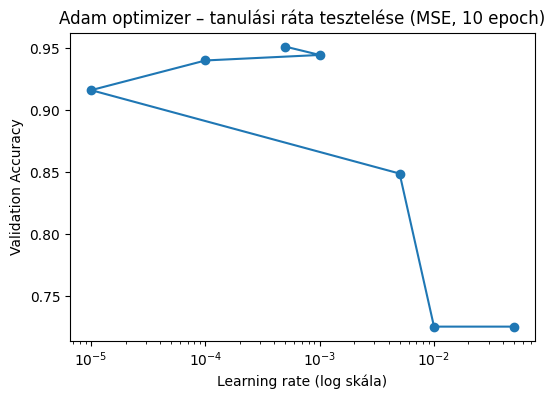

In [ ]:
#%% 4. Eredmények vizualizálása
plt.figure(figsize=(6,4))
plt.plot(df["lr"], df["val_accuracy"], marker='o')
plt.xscale('log')
plt.xlabel("Learning rate (log skála)")
plt.ylabel("Validation Accuracy")
plt.title("Adam optimizer – tanulási ráta tesztelése (MSE, 10 epoch)")
#plt.grid(True, which='both', ls='--', lw=0.5)
plt.show()
